In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import time
from skimage import color
import random

/software/Anaconda3-5.0.1-el7-x86_64/envs/DL_GPU_cuda_9.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Convolutional networks for CIFAR10

### (a) Read in the cifar data. The files are in /project/cmsc25025/mnist/. Display some of the images.

In [2]:
def one_hot(values,n_values=10):
    n_v = np.maximum(n_values,np.max(values) + 1)
    oh=np.eye(n_v)[values]
    return oh

X=np.float32(np.load('/project2/cmsc25025/mnist/CIFAR_10.npy')).reshape(-1,32,32,3) / 255.
Y=one_hot(np.load('/project2/cmsc25025/mnist/CIFAR_labels.npy'))

n = 50000

train_set = (X[0:int(0.9 * n)]/255, Y[0:int(0.9 * n)])
val_set = (X[int(0.9 * n):n]/255, Y[int(0.9 * n):n])
test_data=np.float32(np.load('/project2/cmsc25025/mnist/CIFAR_10_test.npy')).reshape(-1,32,32,3) / 255.
test_labels = one_hot(np.load('/project2/cmsc25025/mnist/CIFAR_labels_test.npy'))
test_set = (test_data, test_labels)

In [3]:
def show_image(X, nr, nc):
    plt.figure(figsize=(nc*2, nr*2))
    for i in range(nr*nc):
        plt.subplot(nr, nc, i+1)
        plt.imshow(X[i], cmap='brg')
        plt.axis('off')
    plt.axis('off')
    plt.show()
def show_layer_image(layer, nr, nc):
    plt.figure(figsize=(nc*2, nr*2))
    for i in range(nr*nc):
        plt.subplot(nr, nc, i+1)
        plt.imshow(layer[i][0], cmap='brg')
        plt.axis('off')
    plt.axis('off')
    plt.show()

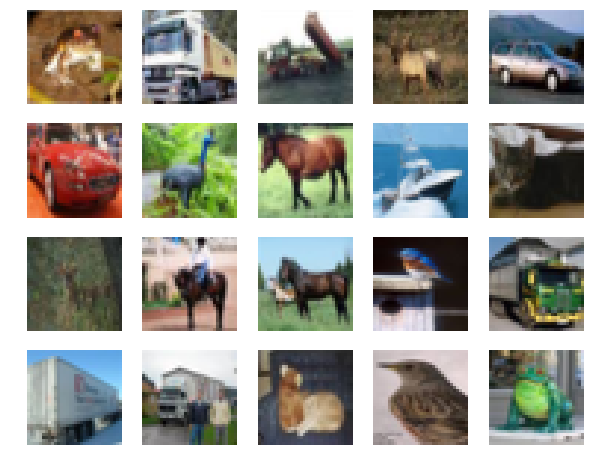

In [4]:
show_image(X[:20], 4, 5)

### (b) Modify the code to apply the original network to the cifar data. Remember that the images now have 3 color channels. Again plot training and validation error against epoch number. Plot the first layer filters.

In [17]:
def getModel(f1 = 32, f2 = 64, numF = 5, depth = 1):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer((32,32,3)))
    model.add(keras.layers.Conv2D(filters=f1, kernel_size=(numF,numF), padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Dropout(rate=0.4))
    for i in range(depth):
        model.add(keras.layers.Conv2D(filters=f2, kernel_size=(numF,numF), padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Dropout(rate=0.4))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    model.compile(optimizer=tf.train.AdadeltaOptimizer(0.5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
bs = 96
epocs = 20

errors = []
model = getModel()
hist = model.fit(x=train_set[0], y=train_set[1],
              epochs=epocs, batch_size=bs,
              shuffle=True,
              validation_data=val_set)
train_errors = 1- np.array(hist.history.get('acc'))
val_errors = 1- np.array(hist.history.get('val_acc'))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 15s 343us/step - loss: 2.3020 - acc: 0.1086 - val_loss: 2.2982 - val_acc: 0.1614
Epoch 2/20
45000/45000 [==============================] - 7s 150us/step - loss: 2.1889 - acc: 0.1975 - val_loss: 2.0716 - val_acc: 0.2632
Epoch 3/20
45000/45000 [==============================] - 7s 150us/step - loss: 2.0356 - acc: 0.2693 - val_loss: 1.9869 - val_acc: 0.2952
Epoch 4/20
45000/45000 [==============================] - 7s 166us/step - loss: 1.9375 - acc: 0.3092 - val_loss: 1.8901 - val_acc: 0.3338
Epoch 5/20
45000/45000 [==============================] - 7s 152us/step - loss: 1.8550 - acc: 0.3381 - val_loss: 1.7963 - val_acc: 0.3582
Epoch 6/20
45000/45000 [==============================] - 7s 148us/step - loss: 1.7768 - acc: 0.3642 - val_loss: 1.7206 - val_acc: 0.3846
Epoch 7/20
45000/45000 [==============================] - 7s 148us/step - loss: 1.7196 - acc: 0.3838 - val_loss: 1.6754 - 

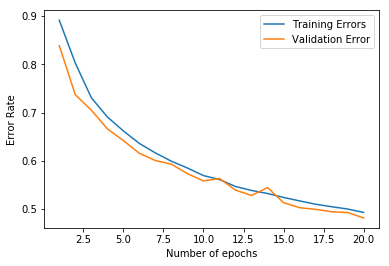

In [10]:
plt.plot(range(1,epocs+1), train_errors)
plt.plot(range(1,epocs+1), val_errors)
plt.legend(["Training Errors", "Validation Error"])
plt.xlabel('Number of epochs')
plt.ylabel('Error Rate')
plt.show()

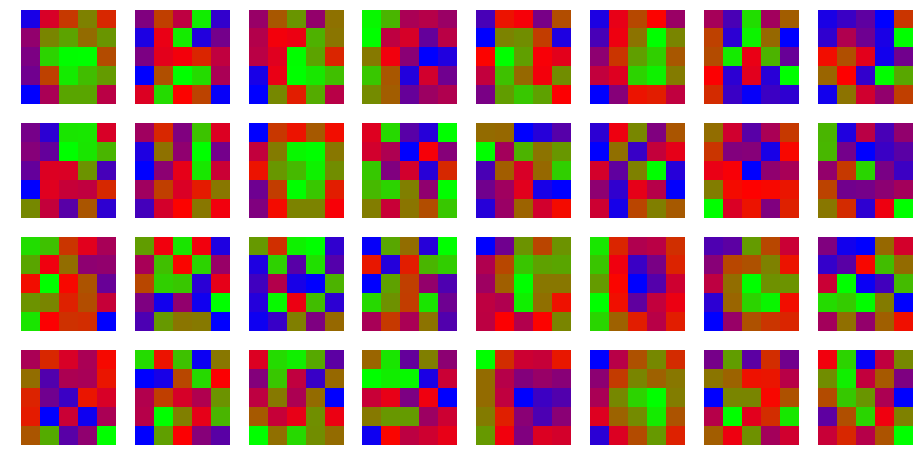

In [11]:
show_layer_image(model.layers[0].get_weights()[0].T, 4, 8)

### (c) Try to define a deeper network with the same number of parameters and see if you get an improvement.

In [18]:
depth_parameters = [2,3,4] 
dtrain_errors = []
dval_errors = []
dtime = []
for d in depth_parameters:
    print("Running with depth:", d)
    model = getModel(depth = d)
    start = time.time()
    hist = model.fit(x=train_set[0], y=train_set[1],
              epochs=20, batch_size=96,
              shuffle=True,
              validation_data=val_set)
    dtime.append(time.time() - start)
    dtrain_errors.append(1- hist.history.get('acc')[-1])
    dval_errors.append(1- hist.history.get('val_acc')[-1])

Running with depth: 2
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 11s 242us/step - loss: 2.3026 - acc: 0.1004 - val_loss: 2.3025 - val_acc: 0.1014
Epoch 2/20
45000/45000 [==============================] - 10s 219us/step - loss: 2.2575 - acc: 0.1440 - val_loss: 2.1021 - val_acc: 0.2434
Epoch 3/20
45000/45000 [==============================] - 10s 220us/step - loss: 2.0578 - acc: 0.2587 - val_loss: 1.9321 - val_acc: 0.3108
Epoch 4/20
45000/45000 [==============================] - 10s 220us/step - loss: 1.8447 - acc: 0.3430 - val_loss: 1.7374 - val_acc: 0.3788
Epoch 5/20
45000/45000 [==============================] - 10s 220us/step - loss: 1.7162 - acc: 0.3890 - val_loss: 1.6870 - val_acc: 0.3978
Epoch 6/20
45000/45000 [==============================] - 10s 219us/step - loss: 1.6331 - acc: 0.4139 - val_loss: 1.5492 - val_acc: 0.4422
Epoch 7/20
45000/45000 [==============================] - 10s 219us/step - loss: 1.5681 - acc: 

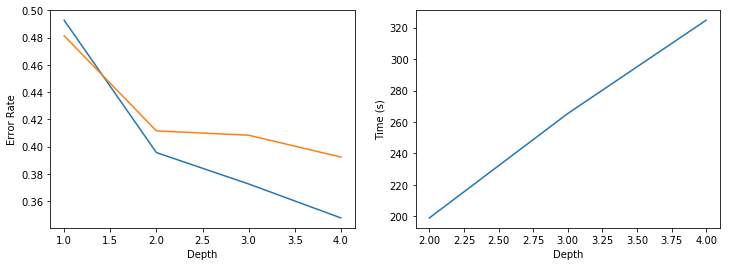

In [25]:
dte = np.concatenate(([train_errors[-1]],dtrain_errors))
dve = np.concatenate(([val_errors[-1]],dval_errors))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1,5), dte)
plt.plot(range(1,5), dve)
plt.xlabel('Depth')
plt.ylabel('Error Rate')
plt.legend = (["Training Error", "Validation Error"])
plt.subplot(1, 2, 2)
plt.plot(depth_parameters, dtime)
plt.xlabel('Depth')
plt.ylabel('Time (s)')
plt.show()

Having a deeper network definitely helps the model perform better. With a depth of 4, the error rate drops to about 35%. This is extremely significant and thus this change defintely inproved the model. With only 20 epochs, this is fairly good given how complex object recognition is. The time obviously linearly increases, but the increase in accuracy is definitely worth the increase in accuracy.

### (d) Variability. Use skimage.color.rgb2hsv to transform the rgb color map of the input images to and hsv - hue, saturation, value. You can use hsv2rgb to trans- form back. (To read more about different color coding methods see: https://en.wikipedia.org/wiki/HSL_and_HSV. 

#### For each image in the test set multiply the saturation of all pixels values by a fixed value drawn randomly between .75 and 1.25. Then convert back to RGB. Saturation is a value between 0 and 1 providing a sense of how ‘colorful’ the pixel is.)

In [27]:
Xhsv = np.array([color.rgb2hsv(x) for x in X])
for i in range(len(Xhsv)):
    Xhsv[i] = [[[xj[0], min(xj[1] * (random.random()/2 + 0.75),1), xj[2]] for xj in xi] for xi in Xhsv[i]]
X_trans = np.array([color.hsv2rgb(x) for x in Xhsv])


test_hsv = np.array([color.rgb2hsv(x) for x in test_set[0]])
for i in range(len(test_hsv)):
    test_hsv[i] = [[[xj[0], min(xj[1] * (random.random()/2 + 0.75),1), xj[2]] for xj in xi] for xi in test_hsv[i]]
test_trans = np.array([color.hsv2rgb(x) for x in test_hsv])

#### Show some of the resulting images. 

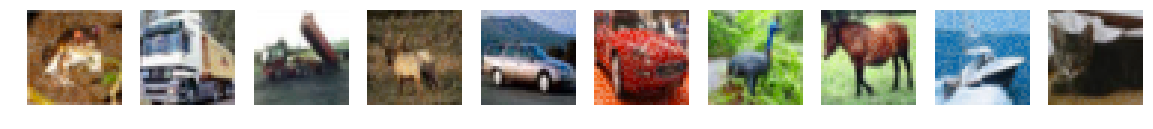

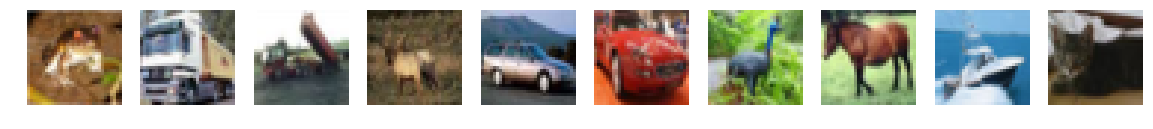

In [12]:
show_image(X_trans[:10],1,10)
show_image(X,1,10)

#### Run the model on the modified data and report the result.

In [40]:
n=50000
trans_train_set = (X_trans[0:int(0.9 * n)]/255, Y[0:int(0.9 * n)])
trans_val_set = (X_trans[int(0.9 * n):n]/255, Y[int(0.9 * n):n])

In [41]:
bs = 96
epocs = 20

errors = []
model = getModel()
hist = model.fit(x=trans_train_set[0], y=trans_train_set[1],
              epochs=epocs, batch_size=bs,
              shuffle=True,
              validation_data=trans_val_set)
train_errors = 1- np.array(hist.history.get('acc'))
val_errors = 1- np.array(hist.history.get('val_acc'))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 8s 183us/step - loss: 2.2996 - acc: 0.1210 - val_loss: 2.2810 - val_acc: 0.1108
Epoch 2/20
45000/45000 [==============================] - 7s 154us/step - loss: 2.1630 - acc: 0.2099 - val_loss: 2.0784 - val_acc: 0.2446
Epoch 3/20
45000/45000 [==============================] - 7s 156us/step - loss: 2.0376 - acc: 0.2685 - val_loss: 1.9720 - val_acc: 0.2974
Epoch 4/20
45000/45000 [==============================] - 8s 175us/step - loss: 1.9421 - acc: 0.3060 - val_loss: 1.8784 - val_acc: 0.3324
Epoch 5/20
45000/45000 [==============================] - 7s 154us/step - loss: 1.8470 - acc: 0.3395 - val_loss: 1.7878 - val_acc: 0.3616
Epoch 6/20
45000/45000 [==============================] - 7s 154us/step - loss: 1.7738 - acc: 0.3670 - val_loss: 1.7268 - val_acc: 0.3892
Epoch 7/20
45000/45000 [==============================] - 7s 152us/step - loss: 1.7215 - acc: 0.3844 - val_loss: 1.6893 - v

In [42]:
print("The training error rate is", 1- hist.history.get('acc')[-1])
print("The validaiton error rate is", 1- hist.history.get('val_acc')[-1])

The training error rate is 0.4904666653315226
The validaiton error rate is 0.4832000005722046


The model only performed slightly worse on this transformed data. This is interesting as changing the saturation has an extremely small of an effect on the accuracy of the model where as transforming the data as shown in problem 1 had a huge effect. However, this does make sense as the model should be resilient to slight variation in the pixel data, as this is just variance, but it is not resilient to moving the pixels around and transforming them.